In [1]:
import os
import math
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

python ../src/main_image_classifiers_clml-Copy1.py --alpha=0.01 --batch_size=128 --beta=0.001 --dataset="CIFAR-10" --dataset_dir="/cluster/tufts/hugheslab/eharve06/CIFAR-10" --experiments_dir="/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/AAA" --la_batch_size=64 --lr_0=0.001 --model_arch="ConvNeXt-Tiny" --model_name="l2-sp_alpha=0.01_beta=0.001_lr_0=0.001_n=100_random_state=3001" --n=100 --num_workers=0 --prior_dir="/cluster/tufts/hugheslab/eharve06/convnext_tiny_torchvision" --prior_type="convnext_tiny_torchvision" --random_state=3001 --tune --save

In [15]:
experiments_dir = "/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/tuned_CIFAR-10_ConvNeXt_Tiny"
model_name = "l2-sp_alpha=0.01_beta=0.001_lr_0=0.001_n=100_random_state=3001"
df1 = pd.read_csv(f"{experiments_dir}/{model_name}.csv")
experiments_dir = "/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/tuned_CIFAR-10_ConvNeXt-Tiny_CLML"
df2 = pd.read_csv(f"{experiments_dir}/{model_name}.csv")
experiments_dir = "/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/AAA"
df3 = pd.read_csv(f"{experiments_dir}/{model_name}.csv")

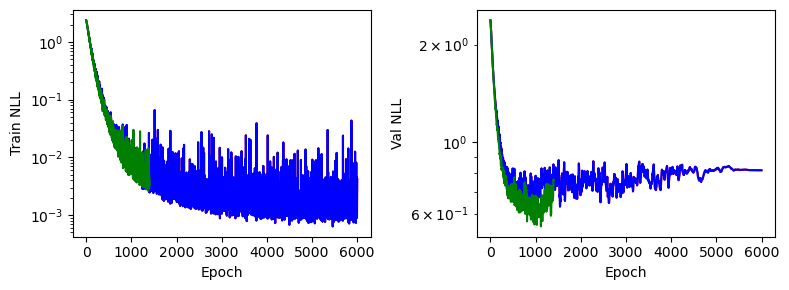

In [16]:
ncols, nrows = 2, 1
fig, axs = plt.subplots(figsize=(4*ncols, 3*nrows), ncols=ncols, nrows=nrows)

axs[0].plot(df1.epoch, df1.train_nll, color="red")
axs[0].plot(df2.epoch, df2.train_nll, color="blue")
axs[0].plot(df3.epoch, df3.train_nll, color="green")
axs[0].set_yscale("log")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Train NLL")

axs[1].plot(df1.epoch, df1.val_or_test_nll, color="red")
axs[1].plot(df2.epoch, df2.val_or_test_nll, color="blue")
axs[1].plot(df3.epoch, df3.val_or_test_nll, color="green")
axs[1].set_yscale("log")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Val NLL")

fig.tight_layout()
plt.show()

In [50]:
alphas = [0.01, 0.001, 0.0001, 1e-05, 1e-06, 0.0]
betas = [0.01, 0.001, 0.0001, 1e-05, 1e-06, 0.0]
dataset = "CIFAR-10"
dataset_dir = "/cluster/tufts/hugheslab/eharve06/CIFAR-10"
tuned_experiments_dir = "/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/tuned_CIFAR-10_ConvNeXt-Tiny_CLML2"
retrained_experiments_dir = "/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_CIFAR-10_ConvNeXt-Tiny_CLML2"
lr_0s = [0.1, 0.01, 0.001, 0.0001]
model = "l2-sp"
model_arch = "ConvNeXt-Tiny"
ns = [100]
prior_dir = "/cluster/tufts/hugheslab/eharve06/convnext_tiny_torchvision"
prior_type = "convnext_tiny_torchvision"
random_states = [1001, 2001, 3001]

count = -1
for alpha, beta, lr_0, n, random_state in itertools.product(alphas, betas, lr_0s, ns, random_states):
    model_name = f"{model}_alpha={alpha}_beta={beta}_lr_0={lr_0}_n={n}_random_state={random_state}"
    if os.path.exists(f"{tuned_experiments_dir}/{model_name}.csv"):
        temp_df = pd.read_csv(f"{tuned_experiments_dir}/{model_name}.csv")
        tuned_n = n - int((1/5) * n)
        if check_epochs(temp_df, tuned_n, batch_size=min(128, tuned_n), steps=6000):
            temp = temp_df.val_or_test_temp.values[-1]
            if not os.path.exists(f"{retrained_experiments_dir}/{model_name}.csv"):
                count += 1
                print(f"    'python ../src/main_image_classifiers-Copy2.py --alpha={alpha} --batch_size=128 --beta={beta} --dataset=\"{dataset}\" --dataset_dir=\"{dataset_dir}\" --experiments_dir=\"{retrained_experiments_dir}\" --la_batch_size=64 --lr_0={lr_0} --model_arch=\"{model_arch}\" --model_name=\"{model_name}\" --n={n} --num_workers=0 --prior_dir=\"{prior_dir}\" --prior_type=\"{prior_type}\" --random_state={random_state} --temps {temp} --save'")
        #    count += 1
        #    print(f"    'python ../src/main_image_classifiers-Copy2.py --alpha={alpha} --batch_size=128 --beta={beta} --dataset=\"{dataset}\" --dataset_dir=\"{dataset_dir}\" --experiments_dir=\"{experiments_dir}\" --la_batch_size=64 --lr_0={lr_0} --model_arch=\"{model_arch}\" --model_name=\"{model_name}\" --n={n} --num_workers=0 --prior_dir=\"{prior_dir}\" --prior_type=\"{prior_type}\" --random_state={random_state} --tune --save'")
    #else:
    #count += 1
    #print(f"    'python ../src/main_image_classifiers-Copy2.py --alpha={alpha} --batch_size=128 --beta={beta} --dataset=\"{dataset}\" --dataset_dir=\"{dataset_dir}\" --experiments_dir=\"{experiments_dir}\" --la_batch_size=64 --lr_0={lr_0} --model_arch=\"{model_arch}\" --model_name=\"{model_name}\" --n={n} --num_workers=0 --prior_dir=\"{prior_dir}\" --prior_type=\"{prior_type}\" --random_state={random_state} --tune --save'")
print(count)

    'python ../src/main_image_classifiers-Copy2.py --alpha=0.001 --batch_size=128 --beta=1e-06 --dataset="CIFAR-10" --dataset_dir="/cluster/tufts/hugheslab/eharve06/CIFAR-10" --experiments_dir="/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_CIFAR-10_ConvNeXt-Tiny_CLML2" --la_batch_size=64 --lr_0=0.01 --model_arch="ConvNeXt-Tiny" --model_name="l2-sp_alpha=0.001_beta=1e-06_lr_0=0.01_n=100_random_state=2001" --n=100 --num_workers=0 --prior_dir="/cluster/tufts/hugheslab/eharve06/convnext_tiny_torchvision" --prior_type="convnext_tiny_torchvision" --random_state=2001 --temps 0.0001 --save'
    'python ../src/main_image_classifiers-Copy2.py --alpha=0.001 --batch_size=128 --beta=1e-06 --dataset="CIFAR-10" --dataset_dir="/cluster/tufts/hugheslab/eharve06/CIFAR-10" --experiments_dir="/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_CIFAR-10_ConvNeXt-Tiny_CLML2" --la_batch_size=64 --lr_0=0.01 --model_arch="ConvNeXt-Tiny" --model_name="l2-s

    'python ../src/main_image_classifiers-Copy2.py --alpha=0.001 --batch_size=128 --beta=0.0 --dataset="CIFAR-10" --dataset_dir="/cluster/tufts/hugheslab/eharve06/CIFAR-10" --experiments_dir="/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_CIFAR-10_ConvNeXt-Tiny_CLML2" --la_batch_size=64 --lr_0=0.001 --model_arch="ConvNeXt-Tiny" --model_name="l2-sp_alpha=0.001_beta=0.0_lr_0=0.001_n=100_random_state=3001" --n=100 --num_workers=0 --prior_dir="/cluster/tufts/hugheslab/eharve06/convnext_tiny_torchvision" --prior_type="convnext_tiny_torchvision" --random_state=3001 --temps 0.0001 --save'
    'python ../src/main_image_classifiers-Copy2.py --alpha=0.001 --batch_size=128 --beta=0.0 --dataset="CIFAR-10" --dataset_dir="/cluster/tufts/hugheslab/eharve06/CIFAR-10" --experiments_dir="/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_CIFAR-10_ConvNeXt-Tiny_CLML2" --la_batch_size=64 --lr_0=0.0001 --model_arch="ConvNeXt-Tiny" --model_name="l2-sp_

    'python ../src/main_image_classifiers-Copy2.py --alpha=0.0001 --batch_size=128 --beta=0.001 --dataset="CIFAR-10" --dataset_dir="/cluster/tufts/hugheslab/eharve06/CIFAR-10" --experiments_dir="/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_CIFAR-10_ConvNeXt-Tiny_CLML2" --la_batch_size=64 --lr_0=0.1 --model_arch="ConvNeXt-Tiny" --model_name="l2-sp_alpha=0.0001_beta=0.001_lr_0=0.1_n=100_random_state=1001" --n=100 --num_workers=0 --prior_dir="/cluster/tufts/hugheslab/eharve06/convnext_tiny_torchvision" --prior_type="convnext_tiny_torchvision" --random_state=1001 --temps 0.0001 --save'
    'python ../src/main_image_classifiers-Copy2.py --alpha=0.0001 --batch_size=128 --beta=0.001 --dataset="CIFAR-10" --dataset_dir="/cluster/tufts/hugheslab/eharve06/CIFAR-10" --experiments_dir="/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_CIFAR-10_ConvNeXt-Tiny_CLML2" --la_batch_size=64 --lr_0=0.1 --model_arch="ConvNeXt-Tiny" --model_name="l2-s

    'python ../src/main_image_classifiers-Copy2.py --alpha=0.0001 --batch_size=128 --beta=0.0001 --dataset="CIFAR-10" --dataset_dir="/cluster/tufts/hugheslab/eharve06/CIFAR-10" --experiments_dir="/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_CIFAR-10_ConvNeXt-Tiny_CLML2" --la_batch_size=64 --lr_0=0.01 --model_arch="ConvNeXt-Tiny" --model_name="l2-sp_alpha=0.0001_beta=0.0001_lr_0=0.01_n=100_random_state=2001" --n=100 --num_workers=0 --prior_dir="/cluster/tufts/hugheslab/eharve06/convnext_tiny_torchvision" --prior_type="convnext_tiny_torchvision" --random_state=2001 --temps 0.0001 --save'
    'python ../src/main_image_classifiers-Copy2.py --alpha=0.0001 --batch_size=128 --beta=0.0001 --dataset="CIFAR-10" --dataset_dir="/cluster/tufts/hugheslab/eharve06/CIFAR-10" --experiments_dir="/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_CIFAR-10_ConvNeXt-Tiny_CLML2" --la_batch_size=64 --lr_0=0.01 --model_arch="ConvNeXt-Tiny" --model_name

    'python ../src/main_image_classifiers-Copy2.py --alpha=0.0001 --batch_size=128 --beta=1e-05 --dataset="CIFAR-10" --dataset_dir="/cluster/tufts/hugheslab/eharve06/CIFAR-10" --experiments_dir="/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_CIFAR-10_ConvNeXt-Tiny_CLML2" --la_batch_size=64 --lr_0=0.001 --model_arch="ConvNeXt-Tiny" --model_name="l2-sp_alpha=0.0001_beta=1e-05_lr_0=0.001_n=100_random_state=2001" --n=100 --num_workers=0 --prior_dir="/cluster/tufts/hugheslab/eharve06/convnext_tiny_torchvision" --prior_type="convnext_tiny_torchvision" --random_state=2001 --temps 0.0001 --save'
    'python ../src/main_image_classifiers-Copy2.py --alpha=0.0001 --batch_size=128 --beta=1e-05 --dataset="CIFAR-10" --dataset_dir="/cluster/tufts/hugheslab/eharve06/CIFAR-10" --experiments_dir="/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_CIFAR-10_ConvNeXt-Tiny_CLML2" --la_batch_size=64 --lr_0=0.001 --model_arch="ConvNeXt-Tiny" --model_name

    'python ../src/main_image_classifiers-Copy2.py --alpha=0.0001 --batch_size=128 --beta=1e-06 --dataset="CIFAR-10" --dataset_dir="/cluster/tufts/hugheslab/eharve06/CIFAR-10" --experiments_dir="/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_CIFAR-10_ConvNeXt-Tiny_CLML2" --la_batch_size=64 --lr_0=0.0001 --model_arch="ConvNeXt-Tiny" --model_name="l2-sp_alpha=0.0001_beta=1e-06_lr_0=0.0001_n=100_random_state=3001" --n=100 --num_workers=0 --prior_dir="/cluster/tufts/hugheslab/eharve06/convnext_tiny_torchvision" --prior_type="convnext_tiny_torchvision" --random_state=3001 --temps 0.0001 --save'
    'python ../src/main_image_classifiers-Copy2.py --alpha=0.0001 --batch_size=128 --beta=0.0 --dataset="CIFAR-10" --dataset_dir="/cluster/tufts/hugheslab/eharve06/CIFAR-10" --experiments_dir="/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_CIFAR-10_ConvNeXt-Tiny_CLML2" --la_batch_size=64 --lr_0=0.1 --model_arch="ConvNeXt-Tiny" --model_name="

    'python ../src/main_image_classifiers-Copy2.py --alpha=1e-05 --batch_size=128 --beta=0.01 --dataset="CIFAR-10" --dataset_dir="/cluster/tufts/hugheslab/eharve06/CIFAR-10" --experiments_dir="/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_CIFAR-10_ConvNeXt-Tiny_CLML2" --la_batch_size=64 --lr_0=0.01 --model_arch="ConvNeXt-Tiny" --model_name="l2-sp_alpha=1e-05_beta=0.01_lr_0=0.01_n=100_random_state=1001" --n=100 --num_workers=0 --prior_dir="/cluster/tufts/hugheslab/eharve06/convnext_tiny_torchvision" --prior_type="convnext_tiny_torchvision" --random_state=1001 --temps 0.0001 --save'
    'python ../src/main_image_classifiers-Copy2.py --alpha=1e-05 --batch_size=128 --beta=0.01 --dataset="CIFAR-10" --dataset_dir="/cluster/tufts/hugheslab/eharve06/CIFAR-10" --experiments_dir="/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_CIFAR-10_ConvNeXt-Tiny_CLML2" --la_batch_size=64 --lr_0=0.01 --model_arch="ConvNeXt-Tiny" --model_name="l2-sp_a

    'python ../src/main_image_classifiers-Copy2.py --alpha=1e-05 --batch_size=128 --beta=0.001 --dataset="CIFAR-10" --dataset_dir="/cluster/tufts/hugheslab/eharve06/CIFAR-10" --experiments_dir="/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_CIFAR-10_ConvNeXt-Tiny_CLML2" --la_batch_size=64 --lr_0=0.001 --model_arch="ConvNeXt-Tiny" --model_name="l2-sp_alpha=1e-05_beta=0.001_lr_0=0.001_n=100_random_state=2001" --n=100 --num_workers=0 --prior_dir="/cluster/tufts/hugheslab/eharve06/convnext_tiny_torchvision" --prior_type="convnext_tiny_torchvision" --random_state=2001 --temps 0.0001 --save'
    'python ../src/main_image_classifiers-Copy2.py --alpha=1e-05 --batch_size=128 --beta=0.001 --dataset="CIFAR-10" --dataset_dir="/cluster/tufts/hugheslab/eharve06/CIFAR-10" --experiments_dir="/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_CIFAR-10_ConvNeXt-Tiny_CLML2" --la_batch_size=64 --lr_0=0.001 --model_arch="ConvNeXt-Tiny" --model_name="l

    'python ../src/main_image_classifiers-Copy2.py --alpha=1e-05 --batch_size=128 --beta=0.0001 --dataset="CIFAR-10" --dataset_dir="/cluster/tufts/hugheslab/eharve06/CIFAR-10" --experiments_dir="/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_CIFAR-10_ConvNeXt-Tiny_CLML2" --la_batch_size=64 --lr_0=0.0001 --model_arch="ConvNeXt-Tiny" --model_name="l2-sp_alpha=1e-05_beta=0.0001_lr_0=0.0001_n=100_random_state=3001" --n=100 --num_workers=0 --prior_dir="/cluster/tufts/hugheslab/eharve06/convnext_tiny_torchvision" --prior_type="convnext_tiny_torchvision" --random_state=3001 --temps 0.0001 --save'
    'python ../src/main_image_classifiers-Copy2.py --alpha=1e-05 --batch_size=128 --beta=1e-05 --dataset="CIFAR-10" --dataset_dir="/cluster/tufts/hugheslab/eharve06/CIFAR-10" --experiments_dir="/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_CIFAR-10_ConvNeXt-Tiny_CLML2" --la_batch_size=64 --lr_0=0.1 --model_arch="ConvNeXt-Tiny" --model_name=

    'python ../src/main_image_classifiers-Copy2.py --alpha=1e-05 --batch_size=128 --beta=1e-06 --dataset="CIFAR-10" --dataset_dir="/cluster/tufts/hugheslab/eharve06/CIFAR-10" --experiments_dir="/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_CIFAR-10_ConvNeXt-Tiny_CLML2" --la_batch_size=64 --lr_0=0.1 --model_arch="ConvNeXt-Tiny" --model_name="l2-sp_alpha=1e-05_beta=1e-06_lr_0=0.1_n=100_random_state=3001" --n=100 --num_workers=0 --prior_dir="/cluster/tufts/hugheslab/eharve06/convnext_tiny_torchvision" --prior_type="convnext_tiny_torchvision" --random_state=3001 --temps 0.0001 --save'
    'python ../src/main_image_classifiers-Copy2.py --alpha=1e-05 --batch_size=128 --beta=1e-06 --dataset="CIFAR-10" --dataset_dir="/cluster/tufts/hugheslab/eharve06/CIFAR-10" --experiments_dir="/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_CIFAR-10_ConvNeXt-Tiny_CLML2" --la_batch_size=64 --lr_0=0.01 --model_arch="ConvNeXt-Tiny" --model_name="l2-sp_

    'python ../src/main_image_classifiers-Copy2.py --alpha=1e-05 --batch_size=128 --beta=0.0 --dataset="CIFAR-10" --dataset_dir="/cluster/tufts/hugheslab/eharve06/CIFAR-10" --experiments_dir="/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_CIFAR-10_ConvNeXt-Tiny_CLML2" --la_batch_size=64 --lr_0=0.01 --model_arch="ConvNeXt-Tiny" --model_name="l2-sp_alpha=1e-05_beta=0.0_lr_0=0.01_n=100_random_state=3001" --n=100 --num_workers=0 --prior_dir="/cluster/tufts/hugheslab/eharve06/convnext_tiny_torchvision" --prior_type="convnext_tiny_torchvision" --random_state=3001 --temps 1.0 --save'
    'python ../src/main_image_classifiers-Copy2.py --alpha=1e-05 --batch_size=128 --beta=0.0 --dataset="CIFAR-10" --dataset_dir="/cluster/tufts/hugheslab/eharve06/CIFAR-10" --experiments_dir="/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_CIFAR-10_ConvNeXt-Tiny_CLML2" --la_batch_size=64 --lr_0=0.001 --model_arch="ConvNeXt-Tiny" --model_name="l2-sp_alpha=

    'python ../src/main_image_classifiers-Copy2.py --alpha=1e-06 --batch_size=128 --beta=0.01 --dataset="CIFAR-10" --dataset_dir="/cluster/tufts/hugheslab/eharve06/CIFAR-10" --experiments_dir="/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_CIFAR-10_ConvNeXt-Tiny_CLML2" --la_batch_size=64 --lr_0=0.0001 --model_arch="ConvNeXt-Tiny" --model_name="l2-sp_alpha=1e-06_beta=0.01_lr_0=0.0001_n=100_random_state=1001" --n=100 --num_workers=0 --prior_dir="/cluster/tufts/hugheslab/eharve06/convnext_tiny_torchvision" --prior_type="convnext_tiny_torchvision" --random_state=1001 --temps 0.0001 --save'
    'python ../src/main_image_classifiers-Copy2.py --alpha=1e-06 --batch_size=128 --beta=0.01 --dataset="CIFAR-10" --dataset_dir="/cluster/tufts/hugheslab/eharve06/CIFAR-10" --experiments_dir="/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_CIFAR-10_ConvNeXt-Tiny_CLML2" --la_batch_size=64 --lr_0=0.0001 --model_arch="ConvNeXt-Tiny" --model_name="l

    'python ../src/main_image_classifiers-Copy2.py --alpha=1e-06 --batch_size=128 --beta=0.0001 --dataset="CIFAR-10" --dataset_dir="/cluster/tufts/hugheslab/eharve06/CIFAR-10" --experiments_dir="/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_CIFAR-10_ConvNeXt-Tiny_CLML2" --la_batch_size=64 --lr_0=0.1 --model_arch="ConvNeXt-Tiny" --model_name="l2-sp_alpha=1e-06_beta=0.0001_lr_0=0.1_n=100_random_state=2001" --n=100 --num_workers=0 --prior_dir="/cluster/tufts/hugheslab/eharve06/convnext_tiny_torchvision" --prior_type="convnext_tiny_torchvision" --random_state=2001 --temps 0.0001 --save'
    'python ../src/main_image_classifiers-Copy2.py --alpha=1e-06 --batch_size=128 --beta=0.0001 --dataset="CIFAR-10" --dataset_dir="/cluster/tufts/hugheslab/eharve06/CIFAR-10" --experiments_dir="/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_CIFAR-10_ConvNeXt-Tiny_CLML2" --la_batch_size=64 --lr_0=0.1 --model_arch="ConvNeXt-Tiny" --model_name="l2-s

    'python ../src/main_image_classifiers-Copy2.py --alpha=1e-06 --batch_size=128 --beta=1e-05 --dataset="CIFAR-10" --dataset_dir="/cluster/tufts/hugheslab/eharve06/CIFAR-10" --experiments_dir="/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_CIFAR-10_ConvNeXt-Tiny_CLML2" --la_batch_size=64 --lr_0=0.01 --model_arch="ConvNeXt-Tiny" --model_name="l2-sp_alpha=1e-06_beta=1e-05_lr_0=0.01_n=100_random_state=3001" --n=100 --num_workers=0 --prior_dir="/cluster/tufts/hugheslab/eharve06/convnext_tiny_torchvision" --prior_type="convnext_tiny_torchvision" --random_state=3001 --temps 0.0001 --save'
    'python ../src/main_image_classifiers-Copy2.py --alpha=1e-06 --batch_size=128 --beta=1e-05 --dataset="CIFAR-10" --dataset_dir="/cluster/tufts/hugheslab/eharve06/CIFAR-10" --experiments_dir="/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_CIFAR-10_ConvNeXt-Tiny_CLML2" --la_batch_size=64 --lr_0=0.001 --model_arch="ConvNeXt-Tiny" --model_name="l2-

    'python ../src/main_image_classifiers-Copy2.py --alpha=1e-06 --batch_size=128 --beta=1e-06 --dataset="CIFAR-10" --dataset_dir="/cluster/tufts/hugheslab/eharve06/CIFAR-10" --experiments_dir="/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_CIFAR-10_ConvNeXt-Tiny_CLML2" --la_batch_size=64 --lr_0=0.0001 --model_arch="ConvNeXt-Tiny" --model_name="l2-sp_alpha=1e-06_beta=1e-06_lr_0=0.0001_n=100_random_state=1001" --n=100 --num_workers=0 --prior_dir="/cluster/tufts/hugheslab/eharve06/convnext_tiny_torchvision" --prior_type="convnext_tiny_torchvision" --random_state=1001 --temps 0.0001 --save'
    'python ../src/main_image_classifiers-Copy2.py --alpha=1e-06 --batch_size=128 --beta=1e-06 --dataset="CIFAR-10" --dataset_dir="/cluster/tufts/hugheslab/eharve06/CIFAR-10" --experiments_dir="/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_CIFAR-10_ConvNeXt-Tiny_CLML2" --la_batch_size=64 --lr_0=0.0001 --model_arch="ConvNeXt-Tiny" --model_name

    'python ../src/main_image_classifiers-Copy2.py --alpha=0.0 --batch_size=128 --beta=0.01 --dataset="CIFAR-10" --dataset_dir="/cluster/tufts/hugheslab/eharve06/CIFAR-10" --experiments_dir="/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_CIFAR-10_ConvNeXt-Tiny_CLML2" --la_batch_size=64 --lr_0=0.1 --model_arch="ConvNeXt-Tiny" --model_name="l2-sp_alpha=0.0_beta=0.01_lr_0=0.1_n=100_random_state=2001" --n=100 --num_workers=0 --prior_dir="/cluster/tufts/hugheslab/eharve06/convnext_tiny_torchvision" --prior_type="convnext_tiny_torchvision" --random_state=2001 --temps 1.0 --save'
    'python ../src/main_image_classifiers-Copy2.py --alpha=0.0 --batch_size=128 --beta=0.01 --dataset="CIFAR-10" --dataset_dir="/cluster/tufts/hugheslab/eharve06/CIFAR-10" --experiments_dir="/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_CIFAR-10_ConvNeXt-Tiny_CLML2" --la_batch_size=64 --lr_0=0.1 --model_arch="ConvNeXt-Tiny" --model_name="l2-sp_alpha=0.0_bet

    'python ../src/main_image_classifiers-Copy2.py --alpha=0.0 --batch_size=128 --beta=0.0001 --dataset="CIFAR-10" --dataset_dir="/cluster/tufts/hugheslab/eharve06/CIFAR-10" --experiments_dir="/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_CIFAR-10_ConvNeXt-Tiny_CLML2" --la_batch_size=64 --lr_0=0.1 --model_arch="ConvNeXt-Tiny" --model_name="l2-sp_alpha=0.0_beta=0.0001_lr_0=0.1_n=100_random_state=2001" --n=100 --num_workers=0 --prior_dir="/cluster/tufts/hugheslab/eharve06/convnext_tiny_torchvision" --prior_type="convnext_tiny_torchvision" --random_state=2001 --temps 1.0 --save'
    'python ../src/main_image_classifiers-Copy2.py --alpha=0.0 --batch_size=128 --beta=0.0001 --dataset="CIFAR-10" --dataset_dir="/cluster/tufts/hugheslab/eharve06/CIFAR-10" --experiments_dir="/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_CIFAR-10_ConvNeXt-Tiny_CLML2" --la_batch_size=64 --lr_0=0.1 --model_arch="ConvNeXt-Tiny" --model_name="l2-sp_alpha=0

    'python ../src/main_image_classifiers-Copy2.py --alpha=0.0 --batch_size=128 --beta=1e-06 --dataset="CIFAR-10" --dataset_dir="/cluster/tufts/hugheslab/eharve06/CIFAR-10" --experiments_dir="/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_CIFAR-10_ConvNeXt-Tiny_CLML2" --la_batch_size=64 --lr_0=0.1 --model_arch="ConvNeXt-Tiny" --model_name="l2-sp_alpha=0.0_beta=1e-06_lr_0=0.1_n=100_random_state=3001" --n=100 --num_workers=0 --prior_dir="/cluster/tufts/hugheslab/eharve06/convnext_tiny_torchvision" --prior_type="convnext_tiny_torchvision" --random_state=3001 --temps 1.0 --save'
    'python ../src/main_image_classifiers-Copy2.py --alpha=0.0 --batch_size=128 --beta=1e-06 --dataset="CIFAR-10" --dataset_dir="/cluster/tufts/hugheslab/eharve06/CIFAR-10" --experiments_dir="/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_CIFAR-10_ConvNeXt-Tiny_CLML2" --la_batch_size=64 --lr_0=0.01 --model_arch="ConvNeXt-Tiny" --model_name="l2-sp_alpha=0.0

In [51]:
def check_epochs(df, n, batch_size=128, steps=6000):
    num_batches = math.floor(n/batch_size)
    epochs = int(steps/num_batches)
    return df.shape[0] == epochs

In [52]:
alphas = [0.01, 0.001, 0.0001, 1e-05, 1e-06, 0.0]
betas = [0.01, 0.001, 0.0001, 1e-05, 1e-06, 0.0]
model = 'l2-sp'
dataset_dir = '/cluster/tufts/hugheslab/eharve06/CIFAR-10'
experiments_dir = '/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/tuned_CIFAR-10_ConvNeXt-Tiny_CLML3'
lr_0s = [0.1, 0.01, 0.001, 0.0001]
ns = [100]
random_states = [1001, 2001, 3001]

columns = ['criterion', 'model_name', 'n', 'random_state', 'runtime', 'val_acc', 'val_nll', 'val_bma_acc', 'val_clml']
tuned_df = pd.DataFrame(columns=columns)

for alpha, beta, lr_0, n, random_state in itertools.product(alphas, betas, lr_0s, ns, random_states):
    model_name = f'{model}_alpha={alpha}_beta={beta}_lr_0={lr_0}_n={n}_random_state={random_state}'
    if os.path.exists(f"{experiments_dir}/{model_name}.csv"):
        try:
            temp_df = pd.read_csv(f"{experiments_dir}/{model_name}.csv")
            tuned_n = n - int((1/5) * n)
            if check_epochs(temp_df, tuned_n, batch_size=min(128, tuned_n), steps=6000):
                row = [model, model_name, n, random_state, temp_df['train_sec/epoch'].sum(), temp_df.val_or_test_acc.values[-1], temp_df.val_or_test_nll.values[-1], temp_df.val_or_test_bma_acc.values[-1], temp_df.val_or_test_clml.values[-1]]
                tuned_df.loc[len(tuned_df)] = row
        except:
            pass

experiments_dir = '/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_CIFAR-10_ConvNeXt-Tiny_CLML3'

columns = ['criterion', 'model_name', 'n', 'random_state', 'runtime', 'test_acc', 'test_nll', 'test_bma_acc', 'test_clml']
retrained_df = pd.DataFrame(columns=columns)

for index, row in tuned_df.iterrows():
    if os.path.exists(f"{experiments_dir}/{row.model_name}.csv"):
        temp_df = pd.read_csv(f"{experiments_dir}/{row.model_name}.csv")
        if check_epochs(temp_df, row.n, batch_size=min(128, row.n), steps=6000):
            row = [row.criterion, row.model_name, row.n, row.random_state, temp_df['train_sec/epoch'].sum(), temp_df.val_or_test_acc.values[-1], temp_df.val_or_test_nll.values[-1], temp_df.val_or_test_bma_acc.values[-1], temp_df.val_or_test_clml.values[-1]]
            retrained_df.loc[len(retrained_df)] = row

retrained_df

,criterion,model_name,n,random_state,runtime,test_acc,test_nll,test_bma_acc,test_clml
0,l2-sp,l2-sp_alpha=0.01_beta=0.01_lr_0=0.1_n=100_rand...,100,1001,3724.544745,0.782761,0.766377,0.7847,-0.747644
1,l2-sp,l2-sp_alpha=0.01_beta=0.01_lr_0=0.1_n=100_rand...,100,2001,3706.565347,0.736952,1.067140,0.7330,-0.873376
2,l2-sp,l2-sp_alpha=0.01_beta=0.01_lr_0=0.1_n=100_rand...,100,3001,3693.320181,0.755020,1.001624,0.7601,-0.733081
3,l2-sp,l2-sp_alpha=0.01_beta=0.01_lr_0=0.01_n=100_ran...,100,1001,3698.850240,0.725099,0.940559,0.7291,-1.033153
4,l2-sp,l2-sp_alpha=0.01_beta=0.01_lr_0=0.01_n=100_ran...,100,2001,3667.581079,0.693764,1.179672,0.6953,-0.948894
...,...,...,...,...,...,...,...,...,...
81,l2-sp,l2-sp_alpha=0.001_beta=0.01_lr_0=0.0001_n=100_...,100,3001,3697.529118,0.712376,0.909872,0.7142,-4.203195
82,l2-sp,l2-sp_alpha=0.001_beta=0.001_lr_0=0.1_n=100_ra...,100,1001,3661.898777,0.810511,0.651138,0.8125,-0.650233
83,l2-sp,l2-sp_alpha=0.001_beta=0.001_lr_0=0.1_n=100_ra...,100,2001,3696.424279,0.750666,0.962243,0.7629,-0.763778
84,l2-sp,l2-sp_alpha=0.001_beta=0.001_lr_0=0.1_n=100_ra...,100,3001,3726.231139,0.790518,0.751483,0.7921,-0.646269


In [53]:
tuned_df = tuned_df[tuned_df.model_name.isin(retrained_df.model_name.values)]
tuned_df

,criterion,model_name,n,random_state,runtime,val_acc,val_nll,val_bma_acc,val_clml
0,l2-sp,l2-sp_alpha=0.01_beta=0.01_lr_0=0.1_n=100_rand...,100,1001,4265.031451,0.65,1.227682,0.65,-1.004587
1,l2-sp,l2-sp_alpha=0.01_beta=0.01_lr_0=0.1_n=100_rand...,100,2001,4184.095315,0.60,1.957866,0.60,-1.254513
2,l2-sp,l2-sp_alpha=0.01_beta=0.01_lr_0=0.1_n=100_rand...,100,3001,4131.325726,0.75,0.707096,0.75,-1.053575
3,l2-sp,l2-sp_alpha=0.01_beta=0.01_lr_0=0.01_n=100_ran...,100,1001,3621.107877,0.65,1.680802,0.65,-1.297213
4,l2-sp,l2-sp_alpha=0.01_beta=0.01_lr_0=0.01_n=100_ran...,100,2001,3627.880150,0.65,1.673854,0.70,-1.505644
...,...,...,...,...,...,...,...,...,...
83,l2-sp,l2-sp_alpha=0.001_beta=0.01_lr_0=0.0001_n=100_...,100,3001,3686.163266,0.75,0.967106,0.75,-5.549046
84,l2-sp,l2-sp_alpha=0.001_beta=0.001_lr_0=0.1_n=100_ra...,100,1001,3555.910472,0.70,0.877851,0.70,-0.936535
85,l2-sp,l2-sp_alpha=0.001_beta=0.001_lr_0=0.1_n=100_ra...,100,2001,3592.737626,0.60,1.878107,0.60,-0.934941
86,l2-sp,l2-sp_alpha=0.001_beta=0.001_lr_0=0.1_n=100_ra...,100,3001,3644.835181,0.90,0.298394,0.90,-0.798815


In [54]:
tuned_df['random_state'].value_counts()

random_state
2001    29
3001    29
1001    28
Name: count, dtype: int64

In [55]:
tuned_df.to_csv('tuned_CIFAR-10_ConvNeXt-Tiny_CLML.csv', index=False)
retrained_df.to_csv('retrained_CIFAR-10_ConvNeXt-Tiny_CLML.csv', index=False)